## Analyse results from the sea level projections NetCDF files

In [29]:
import xarray as xr
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import importlib
sys.path.append('../code')
import func_misc as misc
sys.path.append('/Users/dewilebars/Projects/Project_SeaLevelBudgets/Notebooks/')
import SeaLevelContrib as slc

# statistics
import statsmodels.api as sm
import statsmodels.multivariate.pca
import statsmodels.tsa.seasonal

# displaying things
from ipywidgets import Image
import IPython.display

In [43]:
importlib.reload(slc)

<module 'SeaLevelContrib' from '/Users/dewilebars/Projects/Project_SeaLevelBudgets/Notebooks/SeaLevelContrib.py'>

In [2]:
AR5G85_ds = xr.open_dataset('../outputs/SeaLevelPDF_AR5_glo_rcp85.nc')
AR5G85_ds

<xarray.Dataset>
Dimensions:  (bin: 521, proc: 11, time: 95)
Coordinates:
  * time     (time) int64 2006 2007 2008 2009 2010 ... 2096 2097 2098 2099 2100
  * proc     (proc) object 'Global steric' 'Local ocean' ... 'sum anta.' 'Total'
  * bin      (bin) float64 -20.0 -19.0 -18.0 -17.0 ... 497.0 498.0 499.0 500.0
Data variables:
    MAT_RES  (time, proc, bin) float64 ...
Attributes:
    options:        Computations were done with the following options:: Local...
    source_file:    This NetCDF file was built from the Probabilistic Sea Lev...
    creation_date:  2020-02-10 11:46

In [3]:
Perc  = (1,5,10,17,20,50,80,83,90,95,99,99.5,99.9)
perc = misc.perc_df(AR5G85_ds.MAT_RES[-1,10,:], Perc, AR5G85_ds.bin)
perc

,values
percentiles,
1.0,46.0
5.0,53.0
10.0,57.0
17.0,61.0
20.0,63.0
50.0,74.0
80.0,85.0
83.0,87.0
90.0,92.0


In [4]:
AR5L85_ds = xr.open_dataset('../outputs/SeaLevelPDF_loc_rcp85.nc')
AR5L45_ds = xr.open_dataset('../outputs/SeaLevelPDF_loc_rcp45.nc')
AR5L45_ds

<xarray.Dataset>
Dimensions:      (bin: 5201, percentiles: 7, proc: 11, time: 95)
Coordinates:
  * time         (time) int64 2006 2007 2008 2009 2010 ... 2097 2098 2099 2100
  * proc         (proc) object 'Global steric' 'Local ocean' ... 'Total'
  * bin          (bin) float64 -20.0 -19.9 -19.8 -19.7 ... 499.8 499.9 500.0
  * percentiles  (percentiles) int64 1 5 17 50 83 95 99
Data variables:
    MAT_RES      (time, proc, bin) float64 ...
    Perc_ts      (time, proc, percentiles) float64 ...
Attributes:
    options:        Computations were done with the following options:: Local...
    source_file:    This NetCDF file was built from the Probabilistic Sea Lev...
    creation_date:  2020-02-25 09:14

In [5]:
# Plot nice tables of individual contributors
def table_contrib(ds, time):
    Perc  = (1,5,10,17,20,50,80,83,90,95,99,99.5,99.9)
    # Initialize dataframe
    df = pd.DataFrame(index=Perc, columns=ds.proc)
    for i in range(len(ds.proc)):
        perc = misc.perc_df(ds.MAT_RES[time,i,:], Perc, ds.bin)
        df[np.asscalar(ds.proc[i])] = perc['values']
    return df

In [6]:
table_contrib(AR5G85_ds, -1)

proc,Global steric,Local ocean,Inverse barometer,Glaciers,Greenland SMB,Antarctic SMB,Landwater,Antarctic dynamics,Greenland dynamics,sum anta.,Total
1.0,21.0,-20.0,-20.0,8.0,2.0,-13.0,-3.0,-2.0,-20.0,-11.0,46.0
5.0,24.0,-20.0,-20.0,11.0,3.0,-11.0,-1.0,-1.0,2.0,-8.0,53.0
10.0,26.0,-20.0,-20.0,12.0,4.0,-9.0,1.0,0.0,2.0,-6.0,57.0
17.0,27.0,-20.0,-20.0,13.0,5.0,-8.0,2.0,2.0,3.0,-4.0,61.0
20.0,28.0,-20.0,-20.0,14.0,6.0,-8.0,2.0,2.0,3.0,-3.0,63.0
50.0,31.0,-20.0,-20.0,17.0,9.0,-6.0,4.0,9.0,5.0,3.0,74.0
80.0,35.0,0.0,-20.0,21.0,14.0,-4.0,7.0,16.0,7.0,10.0,85.0
83.0,35.0,0.0,-20.0,22.0,15.0,-4.0,7.0,16.0,7.0,11.0,87.0
90.0,37.0,0.0,-20.0,23.0,18.0,-3.0,8.0,18.0,7.0,12.0,92.0
95.0,38.0,0.0,-20.0,25.0,21.0,-3.0,10.0,19.0,8.0,14.0,97.0


In [7]:
table_contrib(AR5L85_ds, -1)

proc,Global steric,Local ocean,Inverse barometer,Glaciers,Greenland SMB,Antarctic SMB,Landwater,Antarctic dynamics,Greenland dynamics,sum anta.,Total
1.0,15.0,-9.0,-20.0,6.5,0.5,-13.6,-1.5,0.4,-20.0,-8.2,43.0
5.0,19.4,-1.1,-20.0,8.3,0.7,-10.9,-0.1,2.3,0.5,-4.9,52.2
10.0,21.8,3.2,-20.0,9.4,0.9,-9.6,0.7,3.7,0.6,-3.1,57.1
17.0,23.9,7.0,-20.0,10.3,1.1,-8.5,1.4,5.1,0.7,-1.2,61.7
20.0,24.7,8.4,-20.0,10.6,1.2,-8.2,1.7,5.7,0.7,-0.6,63.3
50.0,30.2,18.3,-20.0,13.3,1.9,-5.9,3.5,11.4,1.1,5.5,75.8
80.0,35.7,28.3,-20.0,16.2,3.0,-4.0,5.3,20.6,1.6,14.8,89.7
83.0,36.4,29.6,-20.0,16.6,3.2,-3.8,5.5,22.2,1.6,16.4,91.7
90.0,38.6,33.5,-20.0,17.8,3.7,-3.2,6.2,27.5,1.7,21.7,98.0
95.0,40.9,37.8,-20.0,19.1,4.5,-2.5,7.0,34.7,1.8,28.9,105.7


In [8]:
AR5L85_ncl_ds = xr.open_dataset('/Users/dewilebars/Projects/Project_ProbSLR/SLP_v1.4/ExpTest/SeaLevelPDF_namelist_loc_rcp85.nc')
AR5G85_ncl_ds = xr.open_dataset('/Users/dewilebars/Projects/Project_ProbSLR/SLP_v1.4/ExpTest/SeaLevelPDF_namelist_AR5_glo_rcp85.nc')
AR5L85_ncl_ds

<xarray.Dataset>
Dimensions:       (bin: 521, period: 95, proc: 11)
Coordinates:
  * period        (period) int32 2006 2007 2008 2009 ... 2097 2098 2099 2100
  * bin           (bin) float64 -20.0 -19.0 -18.0 -17.0 ... 498.0 499.0 500.0
Dimensions without coordinates: proc
Data variables:
    DataPDF       (period, proc, bin) float64 ...
    ProcessNames  (proc) |S18 ...
Attributes:
    creation_date:  Mon Feb 10 16:11:39 CET 2020
    source_file:    This NetCDF file was built from the Probabilistic Sea  Le...
    title:          Computations were done with the following options:: Local...

In [9]:
# Plot tables of NCL code outputs -> Issues...
def table_contrib_ncl(ds, time, proc):
    Perc  = (1,5,10,17,20,50,80,83,90,95,99,99.5,99.9)
    # Initialize dataframe
    df = pd.DataFrame(index=Perc, columns=proc)
    for i in range(len(proc)):
        perc = misc.perc_df(ds.DataPDF[time,i,:], Perc, ds.bin)
        df[np.asscalar(proc[i])] = perc['values']
    return df
table_contrib_ncl(AR5L85_ncl_ds, -1, AR5L85_ds.proc)

proc,Global steric,Local ocean,Inverse barometer,Glaciers,Greenland SMB,Antarctic SMB,Landwater,Antarctic dynamics,Greenland dynamics,sum anta.,Total
1.0,5.0,-20.0,-20.0,2.0,-20.0,-20.0,-5.0,-20.0,-20.0,-18.0,19.0
5.0,8.0,-19.0,-20.0,3.0,-20.0,-18.0,-4.0,-20.0,-20.0,-16.0,25.0
10.0,9.0,-18.0,-20.0,4.0,-20.0,-17.0,-4.0,-20.0,-20.0,-15.0,28.0
17.0,10.0,-16.0,-20.0,4.0,-20.0,-17.0,-3.0,-20.0,-20.0,-14.0,30.0
20.0,10.0,-16.0,-20.0,4.0,-20.0,-16.0,-3.0,-20.0,-20.0,-14.0,30.0
50.0,12.0,-13.0,-20.0,5.0,-20.0,-15.0,-3.0,-20.0,-20.0,-12.0,34.0
80.0,13.0,-11.0,-20.0,6.0,-20.0,-14.0,-2.0,-20.0,-20.0,-12.0,37.0
83.0,13.0,-11.0,-20.0,6.0,-20.0,-14.0,-2.0,-20.0,-20.0,-12.0,37.0
90.0,14.0,-11.0,-20.0,6.0,-20.0,-14.0,-2.0,-2.0,-20.0,-11.0,37.0
95.0,14.0,-10.0,-20.0,6.0,-20.0,-14.0,-2.0,-2.0,-20.0,-11.0,38.0


In [10]:
table_contrib_ncl(AR5G85_ncl_ds, -1, AR5L85_ds.proc)

proc,Global steric,Local ocean,Inverse barometer,Glaciers,Greenland SMB,Antarctic SMB,Landwater,Antarctic dynamics,Greenland dynamics,sum anta.,Total
1.0,15.0,-20.0,-20.0,4.0,0.0,-19.0,-7.0,-20.0,-20.0,-17.0,32.0
5.0,17.0,-20.0,-20.0,5.0,0.0,-17.0,-6.0,-20.0,-20.0,-15.0,36.0
10.0,18.0,-20.0,-20.0,6.0,1.0,-16.0,-5.0,-20.0,-20.0,-14.0,38.0
17.0,19.0,-20.0,-20.0,6.0,1.0,-16.0,-5.0,-20.0,-20.0,-13.0,39.0
20.0,19.0,-20.0,-20.0,6.0,1.0,-15.0,-4.0,-20.0,-20.0,-13.0,40.0
50.0,20.0,-20.0,-20.0,7.0,1.0,-14.0,-3.0,-20.0,-20.0,-12.0,43.0
80.0,21.0,-20.0,-20.0,8.0,2.0,-13.0,-3.0,-2.0,-20.0,-11.0,45.0
83.0,21.0,-20.0,-20.0,8.0,2.0,-13.0,-3.0,-2.0,-20.0,-11.0,45.0
90.0,21.0,-20.0,-20.0,8.0,2.0,-13.0,-3.0,-2.0,-20.0,-11.0,45.0
95.0,21.0,-20.0,-20.0,8.0,2.0,-13.0,-3.0,-2.0,-20.0,-11.0,45.0


### Compare local RCP projections, KNMI'14 scenarios and tide gauge data

In [73]:
# Read KNMI'14 projections
ROOT = '/Users/dewilebars/Projects/Project_ProbSLR/KNMI14/'
KNMI14_df = pd.read_csv(ROOT + 'K14_scenarios_by_year.csv')
del(KNMI14_df['year.1'])
KNMI14_df = KNMI14_df.set_index('year')

# Add subidence
subsidence = np.arange(KNMI14_df.shape[0]) * 0.045

for i in KNMI14_df.columns:
    KNMI14_df[i + '_sub'] = KNMI14_df[i] + subsidence

KNMI14_df[:10]

,low_05,low_95,high_05,high_95,low_05_sub,low_95_sub,high_05_sub,high_95_sub
year,,,,,,,,
1995,-0.2826,0.3990,-0.2826,0.3990,-0.2826,0.3990,-0.2826,0.3990
1996,0.1787,0.7226,0.1814,0.7251,0.2237,0.7676,0.2264,0.7701
1997,0.3832,1.3960,0.5654,1.5800,0.4732,1.4860,0.6554,1.6700
1998,0.5978,1.6610,0.9111,1.9760,0.7328,1.7960,1.0461,2.1110
1999,0.6499,2.0520,1.2050,2.6090,0.8299,2.2320,1.3850,2.7890
2000,0.7580,2.6900,1.5490,3.4850,0.9830,2.9150,1.7740,3.7100
2001,0.8874,3.1510,1.6750,3.9430,1.1574,3.4210,1.9450,4.2130
2002,1.0880,3.6320,1.8020,4.3510,1.4030,3.9470,2.1170,4.6660
2003,1.3860,4.0530,2.0380,4.7080,1.7460,4.4130,2.3980,5.0680


In [12]:
tg_id = [20, 22, 23, 24, 25, 32]
tg_df = slc.tide_gauge_obs(tg_id, interp=True)
tg_df.iloc[-10:]

# Compute the linear trend
#lin_trend = np.polyfit(np.arange(1993,2019), tg_df.loc[1993:2018], 1)[0,:]
#print(lin_trend)

,20,22,23,24,25,32,Average
time,,,,,,,
2009,12.172611,14.848387,8.513636,10.288312,7.905195,9.902721,10.605144
2010,12.372611,15.748387,7.213636,8.888312,5.705195,8.702721,9.771810
2011,12.772611,16.348387,11.913636,14.388312,12.305195,11.802721,13.255144
2012,12.072611,16.348387,10.413636,12.788312,11.005195,11.202721,12.305144
2013,10.672611,14.748387,7.513636,10.388312,6.705195,8.802721,9.805144
2014,14.472611,17.848387,10.813636,14.788312,12.005195,13.502721,13.905144
2015,14.772611,18.648387,13.813636,20.088312,16.705195,14.902721,16.488477
2016,15.072611,18.848387,11.913636,16.588312,13.005195,14.202721,14.938477
2017,16.672611,21.048387,15.813636,22.388312,17.605195,17.202721,18.455144


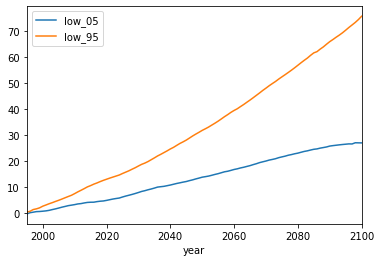

In [13]:
KNMI14_df.iloc[:,0:2].plot()

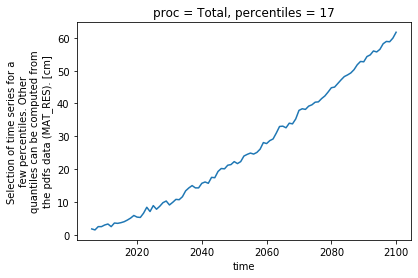

In [14]:
AR5L85_ds.Perc_ts[:,-1,2].plot()

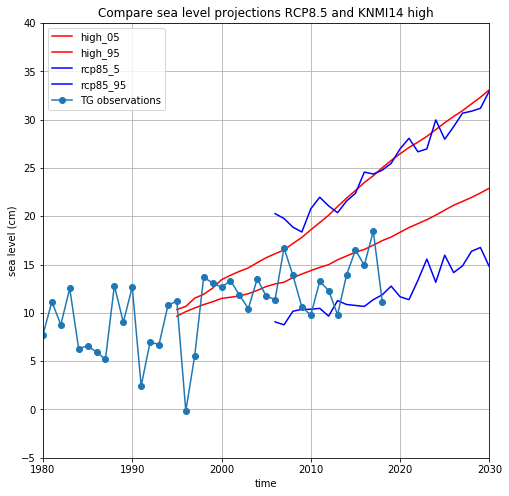

In [15]:
ref_KNMI14 = tg_df.loc[1980:2011].Average.mean()
ref_RCP = tg_df.loc[1986:2006].Average.mean()

#Plot time series
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(KNMI14_df.iloc[:,2] + ref_KNMI14, 'r-', label=KNMI14_df.columns[2])
ax.plot(KNMI14_df.iloc[:,3] + ref_KNMI14, 'r-', label=KNMI14_df.columns[3])
ax.plot(AR5L85_ds.time, AR5L85_ds.Perc_ts[:,-1,1] + ref_RCP, 'b-', label='rcp85_5')
ax.plot(AR5L85_ds.time, AR5L85_ds.Perc_ts[:,-1,5] + ref_RCP, 'b-', label='rcp85_95')
ax.plot(tg_df['Average'], 'o-', label='TG observations')

#ax.set_aspect(1)
ax.set_xlim([1980,2030])
ax.set_ylim([-5,40])
plt.xlabel('time')
plt.ylabel('sea level (cm)')
plt.title('Compare sea level projections RCP8.5 and KNMI14 high')
ax.grid(True)
plt.legend(loc='upper left')

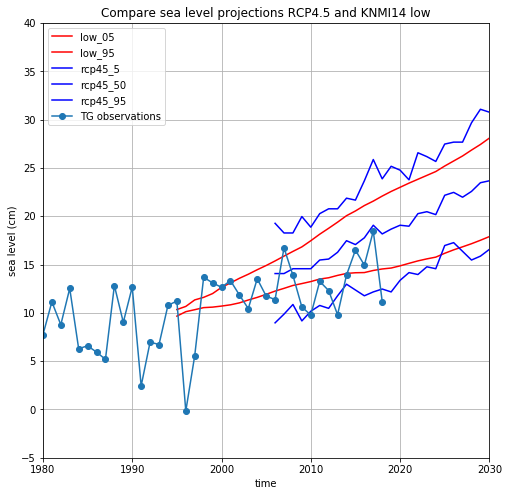

In [16]:
#Plot time series
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(KNMI14_df.iloc[:,0] + ref_KNMI14, 'r-', label=KNMI14_df.columns[0])
ax.plot(KNMI14_df.iloc[:,1] + ref_KNMI14, 'r-', label=KNMI14_df.columns[1])
ax.plot(AR5L45_ds.time, AR5L45_ds.Perc_ts[:,-1,1] + ref_RCP, 'b-', label='rcp45_5')
ax.plot(AR5L45_ds.time, AR5L45_ds.Perc_ts[:,-1,3] + ref_RCP, 'b-', label='rcp45_50')
ax.plot(AR5L45_ds.time, AR5L45_ds.Perc_ts[:,-1,5] + ref_RCP, 'b-', label='rcp45_95')
ax.plot(tg_df['Average'], 'o-', label='TG observations')

#ax.set_aspect(1)
ax.set_xlim([1980,2030])
ax.set_ylim([-5,40])
plt.xlabel('time')
plt.ylabel('sea level (cm)')
plt.title('Compare sea level projections RCP4.5 and KNMI14 low')
ax.grid(True)
plt.legend(loc='upper left')

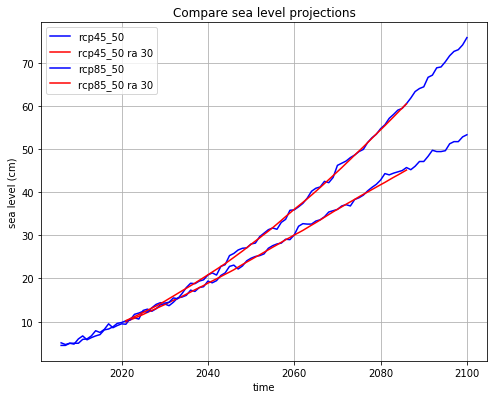

In [17]:
#Plot time series
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(AR5L45_ds.time, AR5L45_ds.Perc_ts[:,-1,3], 'b-', label='rcp45_50')
Perc_ts_ra = AR5L45_ds.Perc_ts.rolling(time=30, center=True).mean()
ax.plot(AR5L45_ds.time, Perc_ts_ra[:,-1,3], 'r-', label='rcp45_50 ra 30')

ax.plot(AR5L85_ds.time, AR5L85_ds.Perc_ts[:,-1,3], 'b-', label='rcp85_50')
Perc_ts_ra = AR5L85_ds.Perc_ts.rolling(time=30, center=True).mean()
ax.plot(AR5L85_ds.time, Perc_ts_ra[:,-1,3], 'r-', label='rcp85_50 ra 30')

ax.set_aspect(1)
#ax.set_xlim([ys,2020])
plt.xlabel('time')
plt.ylabel('sea level (cm)')
plt.title('Compare sea level projections')
ax.grid(True)
plt.legend(loc='upper left')

In [61]:
# define the statistical model
def linear_model(df, with_nodaltides=False, with_wind=False, with_ar=False):
    y = df['Average']
    X = np.c_[
        df['year']-1970, 
    ]
    month = np.mod(df['year'], 1) * 12.0
    names = ['Constant', 'Trend']
    if with_nodaltides:
        X = np.c_[
            X,
            np.cos(2*np.pi*(df['year']-1970)/18.613),
            np.sin(2*np.pi*(df['year']-1970)/18.613)
        ]
        names.extend(['Nodal U', 'Nodal V'])
    if with_wind:
        X = np.c_[
            X, 
            df['u2'],
            df['v2']
        ]
        names.extend(['Wind $u^2$', 'Wind $v^2$'])
    X = sm.add_constant(X)
    if with_ar:
        model = sm.GLSAR(y, X, missing='drop', rho=1)
    else:
        model = sm.OLS(y, X, missing='drop')
    fit = model.fit(cov_type='HC0')
    return fit, names

# define the statistical model
def broken_linear_model(df, with_nodaltides=False, with_wind=False):
    """This model fits the sea-level rise has started to rise faster in 1993."""
    y = df['Average']
    X = np.c_[
        df['year']-1970, 
        (df['year'] > 1993) * (df['year'] - 1993)
    ]
    names = ['Constant', 'Trend', '+trend (1993)']
    
    if with_nodaltides:
        X = np.c_[
            X,
            np.cos(2*np.pi*(df['year']-1970)/18.613),
            np.sin(2*np.pi*(df['year']-1970)/18.613)
        ]
        names.extend(['Nodal U', 'Nodal V'])
    
    if with_wind:
        X = np.c_[
            X, 
            df['u2'],
            df['v2']
        ]
        names.extend(['Wind $u^2$', 'Wind $v^2$'])
    X = sm.add_constant(X)
    model_broken_linear = sm.GLSAR(y, X, rho=1)
    fit = model_broken_linear.iterative_fit(cov_type='HC0')
    return fit, names

tg_df_sel = tg_df.loc[1890:].copy()
tg_df_sel['year'] = tg_df_sel.index

linear_fit, names = linear_model(tg_df_sel)
broken_linear_fit, broken_names = broken_linear_model(tg_df_sel)

tg_df_sel['linear_fit'] = linear_fit.predict()
tg_df_sel['broken_line_fit'] = broken_linear_fit.predict()

tg_df_sel.loc[2000:]

,20,22,23,24,25,32,Average,time,year,linear_fit,broken_line_fit
time,,,,,,,,,,,
2000,11.072611,16.048387,11.313636,13.888312,10.405195,13.102721,12.638477,2000,2000,10.419233,10.356921
2001,12.972611,17.848387,11.213636,14.788312,9.405195,13.802721,13.338477,2001,2001,10.608158,10.609968
2002,11.272611,16.348387,10.013636,12.788312,8.005195,12.702721,11.855144,2002,2002,10.797084,10.863014
2003,10.272611,14.148387,9.013636,10.788312,6.605195,11.802721,10.438477,2003,2003,10.986009,11.116060
2004,13.472611,16.448387,12.213636,13.788312,11.505195,13.702721,13.521810,2004,2004,11.174935,11.369107
2005,14.772611,15.248387,9.513636,10.288312,8.505195,12.102721,11.738477,2005,2005,11.363860,11.622153
2006,12.172611,14.948387,9.713636,10.188312,9.205195,12.002721,11.371810,2006,2006,11.552786,11.875200
2007,16.672611,19.848387,14.413636,17.688312,14.905195,16.802721,16.721810,2007,2007,11.741711,12.128246
2008,13.972611,16.948387,11.913636,13.888312,12.505195,14.002721,13.871810,2008,2008,11.930637,12.381292


In [58]:
# summary of the broken linear model
table = linear_fit.summary(yname='Sea-surface height', 
                           xname=names, 
                           title='Linear model without (1890-current)')
IPython.display.display(table)

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Linear model without (1890-current)                      
==============================================================================
Dep. Variable:     Sea-surface height   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     749.7
Date:                Wed, 26 Feb 2020   Prob (F-statistic):           4.02e-55
Time:                        13:58:50   Log-Likelihood:                -325.92
No. Observations:                 129   AIC:                             655.8
Df Residuals:                     127   BIC:                             661.6
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Constant       4.7515      0.302     15.747      0.000       4.160       5.343
Trend          0.1889      0.007     27.380      0.000       0.175       0.202
==============================================================================
Omnibus:                        3.628   Durbin-Watson:                   1.561
Prob(Omnibus):                  0.163   Jarque-Bera (JB):                3.220
Skew:                          -0.381   Prob(JB):                        0.200
Kurtosis:                       3.139   Cond. No.                         44.1
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [37]:
# summary of the broken linear model
print('rho=%s' % broken_linear_fit.history['rho'][-1])
IPython.display.display(broken_linear_fit.summary(yname='Sea-surface height', 
                                                  xname=broken_names))

rho=[0.11192828]


<class 'statsmodels.iolib.summary.Summary'>
"""
                           GLSAR Regression Results                           
==============================================================================
Dep. Variable:     Sea-surface height   R-squared:                       0.830
Model:                          GLSAR   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     172.5
Date:                Wed, 26 Feb 2020   Prob (F-statistic):           1.91e-49
Time:                        13:37:27   Log-Likelihood:                -314.71
No. Observations:                 128   AIC:                             639.4
Df Residuals:                     123   BIC:                             653.7
Df Model:                           4                                         
Covariance Type:                  HC0                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Constant          4.4269      0.448      9.881      0.000       3.549       5.305
Trend             0.1809      0.010     17.462      0.000       0.161       0.201
+trend (1993)     0.0900      0.062      1.444      0.149      -0.032       0.212
Nodal U           0.5750      0.404      1.423      0.155      -0.217       1.367
Nodal V          -1.2745      0.387     -3.292      0.001      -2.033      -0.516
==============================================================================
Omnibus:                        2.165   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.339   Jarque-Bera (JB):                1.887
Skew:                          -0.296   Prob(JB):                        0.389
Kurtosis:                       3.048   Cond. No.                         56.9
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

### Comparison of KNMI scenarios and tide gauge measurements
Without subsidnce included in the scenarios

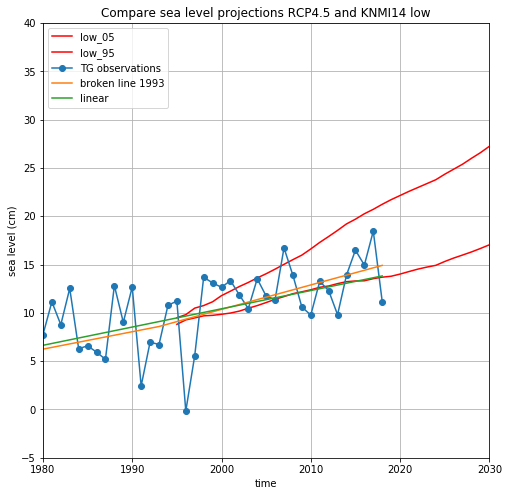

In [76]:
ref_KNMI14_blm = tg_df_sel.loc[1995]['broken_line_fit']

#Plot time series
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(KNMI14_df['low_05'] + ref_KNMI14_blm, 'r-', label=KNMI14_df.columns[0])
ax.plot(KNMI14_df['low_95'] + ref_KNMI14_blm, 'r-', label=KNMI14_df.columns[1])
#ax.plot(AR5L45_ds.time, AR5L45_ds.Perc_ts[:,-1,1] + ref_RCP, 'b-', label='rcp45_5')
#ax.plot(AR5L45_ds.time, AR5L45_ds.Perc_ts[:,-1,3] + ref_RCP, 'b-', label='rcp45_50')
#ax.plot(AR5L45_ds.time, AR5L45_ds.Perc_ts[:,-1,5] + ref_RCP, 'b-', label='rcp45_95')
ax.plot(tg_df['Average'], 'o-', label='TG observations')
ax.plot(tg_df_sel['time'], broken_linear_fit.predict(), label='broken line 1993')
ax.plot(tg_df_sel['time'], linear_fit.predict(), label='linear')


#ax.set_aspect(1)
ax.set_xlim([1980,2030])
ax.set_ylim([-5,40])
plt.xlabel('time')
plt.ylabel('sea level (cm)')
plt.title('Compare sea level projections RCP4.5 and KNMI14 low')
ax.grid(True)
plt.legend(loc='upper left')

With subsidence included in the scenarios

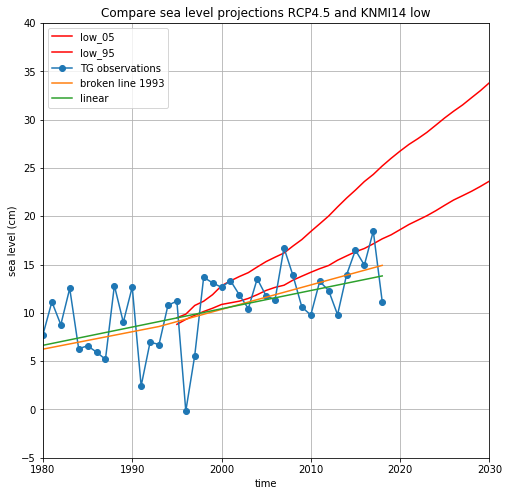

In [80]:
#Plot time series
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(KNMI14_df['high_05_sub'] + ref_KNMI14_blm, 'r-', label=KNMI14_df.columns[0])
ax.plot(KNMI14_df['high_95_sub'] + ref_KNMI14_blm, 'r-', label=KNMI14_df.columns[1])
#ax.plot(AR5L45_ds.time, AR5L45_ds.Perc_ts[:,-1,1] + ref_RCP, 'b-', label='rcp45_5')
#ax.plot(AR5L45_ds.time, AR5L45_ds.Perc_ts[:,-1,3] + ref_RCP, 'b-', label='rcp45_50')
#ax.plot(AR5L45_ds.time, AR5L45_ds.Perc_ts[:,-1,5] + ref_RCP, 'b-', label='rcp45_95')
ax.plot(tg_df['Average'], 'o-', label='TG observations')
ax.plot(tg_df_sel['time'], broken_linear_fit.predict(), label='broken line 1993')
ax.plot(tg_df_sel['time'], linear_fit.predict(), label='linear')


#ax.set_aspect(1)
ax.set_xlim([1980,2030])
ax.set_ylim([-5,40])
plt.xlabel('time')
plt.ylabel('sea level (cm)')
plt.title('Compare sea level projections RCP4.5 and KNMI14 low')
ax.grid(True)
plt.legend(loc='upper left')

Figure for sybren's talk at the Kennis Programma

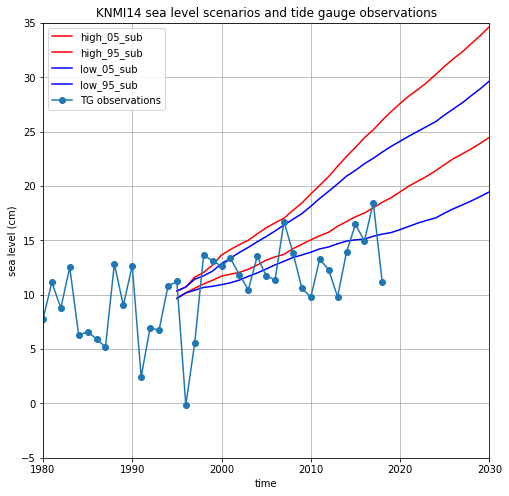

In [89]:
#Plot time series
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(KNMI14_df['high_05_sub'] + ref_KNMI14, 'r-', label='high_05_sub')
ax.plot(KNMI14_df['high_95_sub'] + ref_KNMI14, 'r-', label='high_95_sub')
ax.plot(KNMI14_df['low_05_sub'] + ref_KNMI14, 'b-', label='low_05_sub')
ax.plot(KNMI14_df['low_95_sub'] + ref_KNMI14, 'b-', label='low_95_sub')
ax.plot(tg_df['Average'], 'o-', label='TG observations')

#ax.set_aspect(1)
ax.set_xlim([1980,2030])
ax.set_ylim([-5,35])
plt.xlabel('time')
plt.ylabel('sea level (cm)')
plt.title('KNMI14 sea level scenarios and tide gauge observations')
ax.grid(True)
plt.legend(loc='upper left')

plt.savefig('ComparisonTG_KNMI14.pdf', dpi=150)